In [130]:
# importation des librairies nécessaires à l'exploration
import warnings
warnings.filterwarnings("ignore")
import matplotlib
import numpy as np
import pandas as pd
import scipy.stats as stats
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pingouin as pg
from sklearn.preprocessing import *
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer


# 1. Importation des données

## 1.1. Importation des datasets 2015

In [131]:
# Chargement du fichier de 2015
filepath_2015 = '2015-building-energy-benchmarking.csv'
df_2015 = pd.read_csv(filepath_2015)
df_2015.head(3)

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2015  NonResidential               Hotel   
1              2      2015  NonResidential               Hotel   
2              3      2015  NonResidential               Hotel   

           PropertyName TaxParcelIdentificationNumber  \
0  MAYFLOWER PARK HOTEL                     659000030   
1       PARAMOUNT HOTEL                     659000220   
2          WESTIN HOTEL                     659000475   

                                            Location  CouncilDistrictCode  \
0  {'latitude': '47.61219025', 'longitude': '-122...                    7   
1  {'latitude': '47.61310583', 'longitude': '-122...                    7   
2  {'latitude': '47.61334897', 'longitude': '-122...                    7   

  Neighborhood  YearBuilt  ...  GHGEmissionsIntensity(kgCO2e/ft2)  \
0     DOWNTOWN       1927  ...                               2.64   
1     DOWNTOWN       1996  ...                               2.38   
2     DOWNTOWN       1969  ...                               1.92   

   DefaultData  Comment  ComplianceStatus  Outlier 2010 Census Tracts  \
0           No      NaN         Compliant      NaN                NaN   
1           No      NaN         Compliant      NaN                NaN   
2          Yes      NaN         Compliant      NaN                NaN   

  Seattle Police Department Micro Community Policing Plan Areas  \
0                                               14.0              
1                                               14.0              
2                                               56.0              

   City Council Districts SPD Beats  Zip Codes  
0                     NaN      31.0      18081  
1                     NaN      31.0      18081  
2                     NaN      31.0      18081  

[3 rows x 47 columns]

In [132]:
df_2015.shape

(3340, 47)

In [133]:
df_2015.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

## 1.2. Importation des datasets 2016

In [134]:
# Chargement du fichier de 2016
filepath_2016 = '2016-building-energy-benchmarking.csv'
df_2016 = pd.read_csv(filepath_2016)
df_2016.head(3)

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   

              PropertyName          Address     City State  ZipCode  \
0     Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1          Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2  5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   

  TaxParcelIdentificationNumber  ...  Electricity(kWh) Electricity(kBtu)  \
0                    0659000030  ...      1.156514e+06         3946027.0   
1                    0659000220  ...      9.504252e+05         3242851.0   
2                    0659000475  ...      1.451544e+07        49526664.0   

   NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  Comments  \
0         12764.52930         1276453.0        False       NaN   
1         51450.81641         5145082.0        False       NaN   
2         14938.00000         1493800.0        False       NaN   

   ComplianceStatus  Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
0         Compliant      NaN             249.98                   2.83  
1         Compliant      NaN             295.86                   2.86  
2         Compliant      NaN            2089.28                   2.19  

[3 rows x 46 columns]

In [135]:
df_2016.shape

(3376, 46)

In [136]:
df_2016.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

Avant de fusionner les données 2015 et 2016 il faut un peu nettoyager les datasets.D'abord on fait une harmonisation des noms de colonnes 2015 avec le dataset 2016 et après les chaînes de caractères dans dataset 2015 sont écrites en majuscule, on va donc les passer en minuscule avec la première lettre en majuscule.

In [137]:
# Harmonisation des noms de colonnes avec le dataset de 2016
df_2015.rename(columns={"Zip Codes" : "ZipCode",
                        "GHGEmissions(MetricTonsCO2e)":"TotalGHGEmissions",
                        "GHGEmissionsIntensity(kgCO2e/ft2)" : "GHGEmissionsIntensity"}, inplace=True)

In [138]:
# Passage des chaînes de caractères en minuscule
df_2015['PropertyName'] = df_2015["PropertyName"].str.capitalize()
df_2015['Neighborhood'] = df_2015["Neighborhood"].str.capitalize()
df_2016['PropertyName'] = df_2016["PropertyName"].str.capitalize()
df_2016['Neighborhood'] = df_2016["Neighborhood"].str.capitalize()

In [139]:
df_2015.loc[0,'Location']

'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

la colonne Location est au format JSON

In [140]:
df_2016.loc[0,"Address"]

'405 Olive way'

On voit que la colonnes Location en dataset 2015 contient les colonnes latitude, longitude, address, city, state et zip de dataset 2016 donc on va séparer cette colonnes à 6 colonnes afin de fusionner mieux les deux dataset

In [141]:
df_2015['Latitude'] = df_2015['Location'].apply(lambda x: eval(x)['latitude']).astype('float64')
df_2015['Longitude'] = df_2015['Location'].apply(lambda x: eval(x)['longitude']).astype('float64')
df_2015['HumanAddress'] = df_2015['Location'].apply(lambda x: eval(x)['human_address'])
df_2015['Address'] = df_2015['HumanAddress'].apply(lambda x: eval(x)['address'])
df_2015['City'] = df_2015['HumanAddress'].apply(lambda x: eval(x)['city'])
df_2015['State'] = df_2015['HumanAddress'].apply(lambda x: eval(x)['state'])
df_2015['ZipCode'] = df_2015['HumanAddress'].apply(lambda x: eval(x)['zip'])
df_2015 = df_2015.drop(columns=['Location', 'HumanAddress'])
df_2015.head(3)

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2015  NonResidential               Hotel   
1              2      2015  NonResidential               Hotel   
2              3      2015  NonResidential               Hotel   

           PropertyName TaxParcelIdentificationNumber  CouncilDistrictCode  \
0  Mayflower park hotel                     659000030                    7   
1       Paramount hotel                     659000220                    7   
2          Westin hotel                     659000475                    7   

  Neighborhood  YearBuilt  NumberofBuildings  ...  2010 Census Tracts  \
0     Downtown       1927                  1  ...                 NaN   
1     Downtown       1996                  1  ...                 NaN   
2     Downtown       1969                  1  ...                 NaN   

   Seattle Police Department Micro Community Policing Plan Areas  \
0                                               14.0               
1                                               14.0               
2                                               56.0               

   City Council Districts  SPD Beats ZipCode   Latitude   Longitude  \
0                     NaN       31.0   98101  47.612190 -122.337997   
1                     NaN       31.0   98101  47.613106 -122.333358   
2                     NaN       31.0   98101  47.613349 -122.337699   

         Address     City State  
0  405 OLIVE WAY  SEATTLE    WA  
1    724 PINE ST  SEATTLE    WA  
2   1900 5TH AVE  SEATTLE    WA  

[3 rows x 51 columns]

## 1.3. Création d'un dataset avec les données de 2015 et 2016

In [142]:
# Jointure entre le dataset de 2015 et de 2016
df = pd.concat([df_2015,df_2016], join="outer", ignore_index=True, verify_integrity=True)
df.head(3)

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2015  NonResidential               Hotel   
1              2      2015  NonResidential               Hotel   
2              3      2015  NonResidential               Hotel   

           PropertyName TaxParcelIdentificationNumber  CouncilDistrictCode  \
0  Mayflower park hotel                     659000030                    7   
1       Paramount hotel                     659000220                    7   
2          Westin hotel                     659000475                    7   

  Neighborhood  YearBuilt  NumberofBuildings  ...  \
0     Downtown       1927                1.0  ...   
1     Downtown       1996                1.0  ...   
2     Downtown       1969                1.0  ...   

   Seattle Police Department Micro Community Policing Plan Areas  \
0                                               14.0               
1                                               14.0               
2                                               56.0               

   City Council Districts  SPD Beats  ZipCode   Latitude   Longitude  \
0                     NaN       31.0    98101  47.612190 -122.337997   
1                     NaN       31.0    98101  47.613106 -122.333358   
2                     NaN       31.0    98101  47.613349 -122.337699   

         Address     City  State Comments  
0  405 OLIVE WAY  SEATTLE     WA      NaN  
1    724 PINE ST  SEATTLE     WA      NaN  
2   1900 5TH AVE  SEATTLE     WA      NaN  

[3 rows x 52 columns]

In [143]:
df.shape

(6716, 52)

# 2. Nettoyage du dataset



## 2.1.  Suppression les valeurs manquantes

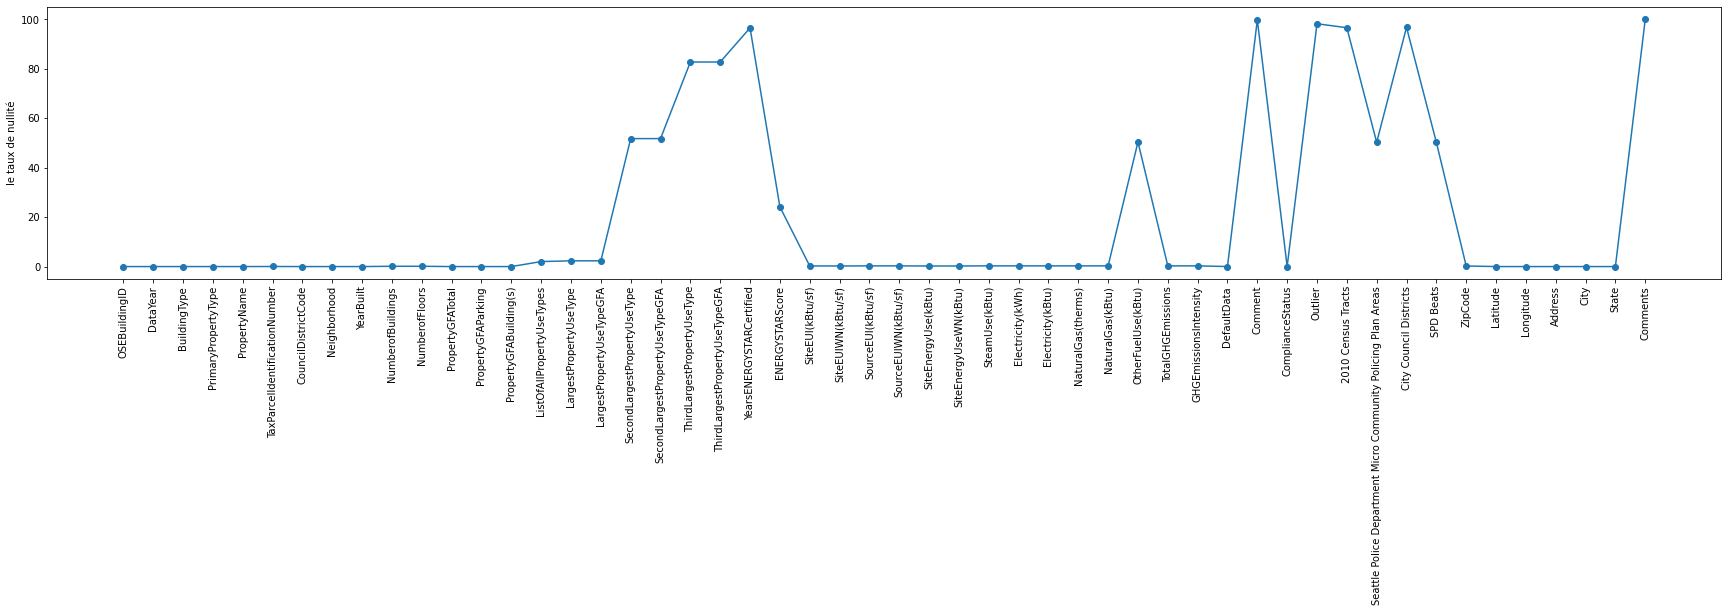

In [144]:
percent_missing = df.isnull().sum() * 100 / len(df)
plt.figure(figsize=(30, 5))
plt.ylabel('le taux de nullité')
plt.xticks(rotation = '90')
plt.plot(percent_missing, 'o-')

On supprime des colonnes avec plus 75% de valeurs manquantes

In [145]:
df = df.loc[:, df.isnull().mean() <.75]
df.shape

(6716, 44)

On corrige le type de la latitude, longitude et le zipcode ainsi que la TaxParcelIdentificationNumber

In [146]:
df["ZipCode"] = pd.to_numeric(df["ZipCode"])
df["Latitude"] = pd.to_numeric(df["Latitude"])
df["Longitude"] = pd.to_numeric(df["Longitude"])

### 2.2. Suppression des batiments résidentiels

Il est précisié dans le projet que seuls les bâtiments non destinés à l'habitation seront étudiés. Nous allons donc supprimer toutes les lignes correspondant à des habitations en nous basant sur la variable BuildingType

In [147]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Multifamily LR (1-4)', 'Campus',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [148]:
df = df[~df['BuildingType'].str.contains("Multifamily")]
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

On va visualiser les diverses catégories représentées dans ce type de bâtiments

 donc onn va vérifier si dans le BuildingType il y a des bâtiments  de type résidentiel on le supprimera

In [149]:
df.loc[(df['BuildingType']=="NonResidential"),'PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    580
Other                          380
Large Office                   335
Mixed Use Property             201
Retail Store                   191
Non-Refrigerated Warehouse     181
Warehouse                      180
Hotel                          149
Worship Facility               143
Medical Office                  80
K-12 School                     78
Distribution Center             53
Distribution Center\n           49
Supermarket / Grocery Store     40
Senior Care Community           39
Supermarket/Grocery Store       36
Self-Storage Facility           29
Self-Storage Facility\n         27
Refrigerated Warehouse          25
Residence Hall                  21
Hospital                        20
University                      17
College/University              16
Residence Hall/Dormitory        15
Restaurant                      12
Laboratory                      11
Restaurant\n                    10
Low-Rise Multifamily             3
Name: PrimaryPropert

In [150]:
df_anomalies = df[~df['BuildingType'].str.contains("Multifamily") & df['PrimaryPropertyType'].str.contains("Multifamily")]
display(df_anomalies)

OSEBuildingID  DataYear    BuildingType   PrimaryPropertyType  \
1311          21481      2015          Campus  Low-Rise Multifamily   
2481          25674      2015  NonResidential  Low-Rise Multifamily   
3984          19445      2016  NonResidential  Low-Rise Multifamily   
4640          21481      2016          Campus  Low-Rise Multifamily   
5790          25674      2016  NonResidential  Low-Rise Multifamily   

                                           PropertyName  \
1311  Sanitary market - master campus for pike place...   
2481                                       Comet tavern   
3984                                     Pacific pointe   
4640                                    Sanitary market   
5790                             (id25674) comet tavern   

     TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
1311                    1976200210                    7     Downtown   
2481                    6003500480                    3         East   
3984                    0354000254                    4   Lake union   
4640                    1976200210                    7     Downtown   
5790                    6003500480                    3         East   

      YearBuilt  NumberofBuildings  ...  DefaultData  ComplianceStatus  \
1311       1942                1.0  ...           No         Compliant   
2481       1910                1.0  ...           No         Compliant   
3984       2000                1.0  ...        False         Compliant   
4640       1942                1.0  ...        False         Compliant   
5790       1910                1.0  ...        False     Non-Compliant   

      Seattle Police Department Micro Community Policing Plan Areas  \
1311                                               14.0               
2481                                                8.0               
3984                                                NaN               
4640                                                NaN               
5790                                                NaN               

      SPD Beats  ZipCode   Latitude   Longitude             Address     City  \
1311       30.0  98101.0  47.609219 -122.340810        1513 1ST AVE  SEATTLE   
2481       11.0  98122.0  47.614329 -122.319762       916 E PIKE ST  SEATTLE   
3984        NaN  98103.0  47.648590 -122.333110  2108 N Pacific St.  Seattle   
4640        NaN  98101.0  47.609180 -122.340790   1525 FIrst Avenue  Seattle   
5790        NaN  98122.0  47.614270 -122.319770       916 E PIKE ST  Seattle   

      State  
1311     WA  
2481     WA  
3984     WA  
4640     WA  
5790     WA  

[5 rows x 44 columns]

on retrouve une anomalie, un usage de type "Low-Rise Multifamily" dans le type "NonResidential". On supprimera donc les lignes contenant le terme "Multifamily" dans le type de bâtiment ou dans son type d'usage.

In [151]:
df = df[~df['BuildingType'].str.contains("Multifamily") & ~df['PrimaryPropertyType'].str.contains("Multifamily")]
display(df.shape)

(3313, 44)

On va corriger les nom catégorie avec un caractère d'échappement 

In [152]:
import re
regex = re.compile(r'[\n\r\t]')
df['PrimaryPropertyType'] = [regex.sub("", item) for index, item in df.PrimaryPropertyType.iteritems()]
df.loc[(df['BuildingType']=="NonResidential"),'PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    580
Other                          380
Large Office                   335
Mixed Use Property             201
Retail Store                   191
Non-Refrigerated Warehouse     181
Warehouse                      180
Hotel                          149
Worship Facility               143
Distribution Center            102
Medical Office                  80
K-12 School                     78
Self-Storage Facility           56
Supermarket / Grocery Store     40
Senior Care Community           39
Supermarket/Grocery Store       36
Refrigerated Warehouse          25
Restaurant                      22
Residence Hall                  21
Hospital                        20
University                      17
College/University              16
Residence Hall/Dormitory        15
Laboratory                      11
Name: PrimaryPropertyType, dtype: int64

### 2.3. Suppression des données doublons

Nous allons également regarder s'il existe des doublons sur l'identifiant OSEBuildingID. 

In [153]:
df.duplicated('OSEBuildingID').sum()

1617

1617 valeurs doublantes pour numéro OSEBuildingID

On effet, nos modélisations devront porter sur un bâtiement unique (ce n'est pas une modélisation temporelle). Nous prendrons donc en valeur la moyenne des variables sur les 2 années :

In [154]:
columns = ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
                'PropertyGFAParking', 'PropertyGFABuilding(s)',
                'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
                'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
                'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
                'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
                'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
                'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity']
OSEBuilding_means = df[['OSEBuildingID']+columns].groupby('OSEBuildingID').mean()
OSEBuilding_means.head()

NumberofBuildings  NumberofFloors  PropertyGFATotal  \
OSEBuildingID                                                        
1                            1.0            12.0           88434.0   
2                            1.0            11.0          103566.0   
3                            1.0            41.0          959050.0   
5                            1.0            10.0           61320.0   
8                            1.0            18.0          147735.0   

               PropertyGFAParking  PropertyGFABuilding(s)  \
OSEBuildingID                                               
1                             0.0                 88434.0   
2                         15064.0                 88502.0   
3                         98359.0                860691.0   
5                             0.0                 61320.0   
8                         37230.0                110505.0   

               LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
OSEBuildingID                                                               
1                                88434.0                              NaN   
2                                83880.0                          15064.0   
3                               756868.0                         100000.0   
5                                61320.0                              NaN   
8                               123445.0                          68009.0   

               ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  ...  \
OSEBuildingID                                                         ...   
1                         62.5         80.299998           82.300002  ...   
2                         56.0         94.600002           98.450001  ...   
3                         30.5         96.300000           98.699998  ...   
5                         28.5        285.600002          287.900002  ...   
8                         71.0        117.450002          120.399998  ...   

               SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
OSEBuildingID                                              
1                        182.050000           7103895.25   
2                        187.299997           8371084.00   
3                        245.300003          72858840.00   
5                        433.600000          17511952.00   
8                        221.350003          14500852.50   

               SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
OSEBuildingID                                                            
1                         7277224.50    2.013457e+06      1.118411e+06   
2                         8715133.50    0.000000e+00      1.047494e+06   
3                        74721692.00    2.061348e+07      1.454968e+07   
5                        17655122.25    1.283648e+07      8.115232e+05   
8                        14867373.00    0.000000e+00      1.675645e+06   

               Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  \
OSEBuildingID                                                            
1                      3816093.5        12744.264650         1274420.5   
2                      3574131.0        47970.408205         4797033.5   
3                     49644549.5        26018.500000         2601850.0   
5                      2768973.5        19065.565430         1906553.5   
8                      5717426.0        87835.492190         8783551.5   

               TotalGHGEmissions  GHGEmissionsIntensity  
OSEBuildingID                                            
1                        249.705                  2.735  
2                        279.685                  2.620  
3                       2075.380                  2.055  
5                       1111.385                 18.025  
8                        506.355                  3.450  

[5 rows x 21 columns]

In [155]:
duplicate_building = df.drop_duplicates(subset=['OSEBuildingID'], keep='last')
duplicate_building.drop(columns, axis=1, inplace=True)
df = pd.merge(duplicate_building, OSEBuilding_means, how='left', on='OSEBuildingID')

Nous allons également regarder s'il existe des doublons sur l'identifiant Address. 

In [156]:
df.duplicated('Address').sum()

21

In [157]:
df = df.drop_duplicates(subset=['Address'])
df.shape

(1675, 44)

## 2.4. Suppression les colonnes non utilisées 

In [158]:
percent_manquant = df.isnull().sum() * 100 / len(df)
percent_manquant

OSEBuildingID                                                     0.000000
DataYear                                                          0.000000
BuildingType                                                      0.000000
PrimaryPropertyType                                               0.000000
PropertyName                                                      0.000000
TaxParcelIdentificationNumber                                     0.000000
CouncilDistrictCode                                               0.000000
Neighborhood                                                      0.000000
YearBuilt                                                         0.000000
ListOfAllPropertyUseTypes                                         0.537313
LargestPropertyUseType                                            0.776119
SecondLargestPropertyUseType                                     48.955224
OtherFuelUse(kBtu)                                               98.208955
DefaultData              

On remarque également des variables suffixées GFA : Elles représente la surface au sol (Ground Floor Area).

In [159]:
df[['SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA']].isna().mean(axis=0)

SecondLargestPropertyUseType       0.489552
SecondLargestPropertyUseTypeGFA    0.488358
dtype: float64

In [160]:
df[['LargestPropertyUseType', 'LargestPropertyUseTypeGFA']].isna().mean(axis=0)

LargestPropertyUseType       0.007761
LargestPropertyUseTypeGFA    0.007761
dtype: float64

In [161]:
df[['Electricity(kWh)', 'Electricity(kBtu)']].isna().mean(axis=0)

Electricity(kWh)     0.000597
Electricity(kBtu)    0.000597
dtype: float64

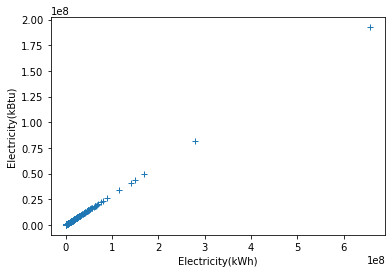

In [162]:
plt.plot(df['Electricity(kBtu)'], df['Electricity(kWh)'],'+')
plt.ylabel('Electricity(kBtu)')
plt.xlabel('Electricity(kWh)')
plt.show()

In [163]:
df[['SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)']].isna().mean(axis=0)

SiteEnergyUse(kBtu)      0.000597
SiteEnergyUseWN(kBtu)    0.000597
dtype: float64

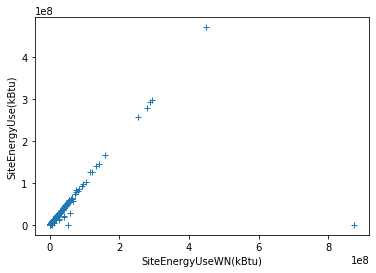

In [164]:
plt.plot(df['SiteEnergyUse(kBtu)'], df['SiteEnergyUseWN(kBtu)'],'+')
plt.ylabel('SiteEnergyUse(kBtu)')
plt.xlabel('SiteEnergyUseWN(kBtu)')
plt.show()

In [165]:
df[['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)']].isna().mean(axis=0)

SiteEUI(kBtu/sf)      0.000597
SiteEUIWN(kBtu/sf)    0.000597
dtype: float64

In [166]:
df[['SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)']].isna().mean(axis=0)

SourceEUI(kBtu/sf)      0.000597
SourceEUIWN(kBtu/sf)    0.000597
dtype: float64

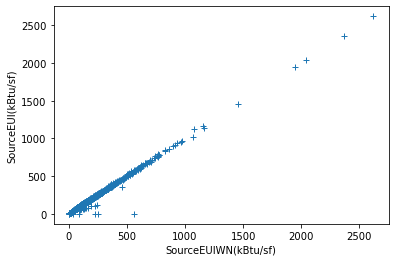

In [167]:
plt.plot(df['SourceEUI(kBtu/sf)'], df['SourceEUIWN(kBtu/sf)'],'+')
plt.ylabel('SourceEUI(kBtu/sf)')
plt.xlabel('SourceEUIWN(kBtu/sf)')
plt.show()

In [168]:
df[['NaturalGas(therms)', 'NaturalGas(kBtu)']].isna().mean(axis=0)

NaturalGas(therms)    0.000597
NaturalGas(kBtu)      0.000597
dtype: float64

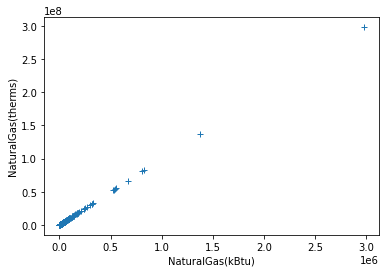

In [169]:
plt.plot(df['NaturalGas(therms)'],df['NaturalGas(kBtu)'],'+')
plt.ylabel('NaturalGas(therms)')
plt.xlabel('NaturalGas(kBtu)')
plt.show()

les données normalisée en fonction des conditions climatiques ne nous intéresserons pas donc on supprimera les colonnes avec le suffixe WN en plus on garde en unité anglaise et on supprime la colonne en kWh .

In [170]:
# Supprimer les colonnes supplèmentaire 
cols_to_remove = ['Electricity(kWh)', 'NaturalGas(therms)', 'OtherFuelUse(kBtu)', 'GHGEmissionsIntensity', 'DefaultData', 'ComplianceStatus', 'SourceEUIWN(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)', 'Seattle Police Department Micro Community Policing Plan Areas', 'SPD Beats']
df = df.drop(cols_to_remove, axis=1)
df.shape

(1675, 33)

In [171]:
df.head(3)

OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
0            325      2015  NonResidential                 Retail Store   
1            400      2015  NonResidential  Small- and Mid-Sized Office   
2            442      2015  NonResidential                 Large Office   

                   PropertyName TaxParcelIdentificationNumber  \
0  Westlake mall retail portion                     659000005   
1    Galland & seneca buildings                    1974700175   
2             King broadcasting                    1991200870   

   CouncilDistrictCode Neighborhood  YearBuilt  \
0                    7     Downtown       1989   
1                    7     Downtown       1906   
2                    7   Lake union       1947   

                         ListOfAllPropertyUseTypes  ...  \
0                                              NaN  ...   
1                                           Office  ...   
2  Data Center, Office, Other, Parking, Restaurant  ...   

  LargestPropertyUseTypeGFA SecondLargestPropertyUseTypeGFA  ENERGYSTARScore  \
0                       NaN                             NaN             91.0   
1                   98370.0                             NaN             45.0   
2                  138672.0                         47539.0             59.0   

   SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf) SiteEnergyUse(kBtu) SteamUse(kBtu)  \
0              60.6               190.2           9898724.0            0.0   
1              66.3               207.5           6525887.0            0.0   
2             105.8               332.3          16760217.0            0.0   

  Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  
0         9899135.0               0.0              69.01  
1         6488262.0           37893.0              47.24  
2        16760914.0               0.0             116.84  

[3 rows x 33 columns]

## 2.5. Traitement des données aberrantes et d'outliers pour les variables quantitatives

In [172]:
df.describe()

OSEBuildingID     DataYear  CouncilDistrictCode    YearBuilt  \
count    1675.000000  1675.000000          1675.000000  1675.000000   
mean    16244.801194  2015.981493             4.382687  1961.537313   
std     13763.495274     0.134818             2.185225    32.933030   
min         1.000000  2015.000000             1.000000  1900.000000   
25%       581.500000  2016.000000             2.000000  1929.500000   
50%     21138.000000  2016.000000             4.000000  1965.000000   
75%     24598.500000  2016.000000             7.000000  1989.000000   
max     50226.000000  2016.000000             7.000000  2015.000000   

            ZipCode     Latitude    Longitude  NumberofBuildings  \
count   1660.000000  1675.000000  1675.000000        1675.000000   
mean   98116.743373    47.616513  -122.332868           1.151045   
std       18.417447     0.047843     0.024634           2.829302   
min    98006.000000    47.499170  -122.411820           0.500000   
25%    98104.000000    47.586855  -122.343253           1.000000   
50%    98109.000000    47.612520  -122.333030           1.000000   
75%    98122.000000    47.649755  -122.321470           1.000000   
max    98199.000000    47.733870  -122.258640         111.000000   

       NumberofFloors  PropertyGFATotal  ...  LargestPropertyUseTypeGFA  \
count     1675.000000      1.675000e+03  ...               1.662000e+03   
mean         4.124179      1.193245e+05  ...               9.964830e+04   
std          6.554531      2.970555e+05  ...               2.776091e+05   
min          0.000000      1.128500e+04  ...               6.455000e+03   
25%          1.000000      2.940850e+04  ...               2.550000e+04   
50%          2.000000      4.995100e+04  ...               4.369450e+04   
75%          4.000000      1.079905e+05  ...               9.316850e+04   
max         99.000000      9.320156e+06  ...               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
count                       857.000000      1139.000000       1674.000000   
mean                      37326.402157        65.161545         71.967473   
std                       69944.410444        28.016154         73.657311   
min                           0.000000         1.000000          0.000000   
25%                        5706.000000        47.250000         32.712500   
50%                       12610.000000        73.000000         51.575000   
75%                       32692.000000        88.500000         81.550000   
max                      686750.000000       100.000000        834.400024   

       SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
count         1674.000000         1.674000e+03    1.674000e+03   
mean           175.771774         8.514786e+06    5.179239e+05   
std            184.019772         3.030189e+07    5.387403e+06   
min              0.000000         0.000000e+00    0.000000e+00   
25%             77.125000         1.216915e+06    0.000000e+00   
50%            131.224999         2.556019e+06    0.000000e+00   
75%            205.950000         6.983950e+06    0.000000e+00   
max           2620.000000         8.739237e+08    1.314066e+08   

       Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  
count       1.674000e+03      1.674000e+03        1674.000000  
mean        5.902765e+06      1.986326e+06         186.620935  
std         2.082773e+07      9.462927e+06         750.446389  
min         7.000000e+00      0.000000e+00           0.120000  
25%         7.247365e+05      0.000000e+00          20.165000  
50%         1.650669e+06      4.979542e+05          50.362500  
75%         4.879469e+06      1.514965e+06         140.293750  
max         6.570744e+08      2.979090e+08       16870.980000  

[8 rows x 22 columns]

In [173]:
df.min()

OSEBuildingID                                        1
DataYear                                          2015
BuildingType                                    Campus
PrimaryPropertyType                Distribution Center
PropertyName                          #4706 bitterlake
TaxParcelIdentificationNumber               0000000000
CouncilDistrictCode                                  1
Neighborhood                                   Ballard
YearBuilt                                         1900
ZipCode                                        98006.0
Latitude                                      47.49917
Longitude                                   -122.41182
Address                                10 Harrison St.
City                                           SEATTLE
State                                               WA
NumberofBuildings                                  0.5
NumberofFloors                                     0.0
PropertyGFATotal                               11285.0
PropertyGF

On supprime toutes les valeurs énergétiques qui sont inférieures à 0 .

In [174]:
df = df.loc[df["PropertyGFATotal"] > 0]
#df = df.loc[df["PropertyGFAParking"] > 0]
#df = df.loc[df["PropertyGFABuilding(s)"] > 0]
df = df.loc[df["SiteEnergyUse(kBtu)"] > 0]
df = df.loc[df['Electricity(kBtu)'] > 0]
df = df.loc[df["TotalGHGEmissions"] > 0]
df = df.loc[df["SourceEUI(kBtu/sf)"] > 0]
df = df.loc[df["SiteEnergyUse(kBtu)"] > 0]

Si on supprime des valeurs inférieurs à 0 pour les colonnes PropertyGFAParking et PropertyGFABuilding(s) on va perdre beaucoup de données donc on supprime que les valeurs moins de 0 de la colonne PropertyGFATotal

In [175]:
df.shape

(1672, 33)

Analysons les données uniques des colonnes



In [176]:
for column in df.columns:
    if df[column].nunique()<20:
        print('Colonne {}, valeurs uniques :\n{}\n'.format(column, df[column].unique()))
    else:
        print('Colonne {}, {} valeurs uniques'.format(column, df[column].nunique()))

Colonne OSEBuildingID, 1672 valeurs uniques
Colonne DataYear, valeurs uniques :
[2015 2016]

Colonne BuildingType, valeurs uniques :
['NonResidential' 'Campus' 'Nonresidential COS' 'SPS-District K-12'
 'Nonresidential WA']

Colonne PrimaryPropertyType, 22 valeurs uniques
Colonne PropertyName, 1666 valeurs uniques
Colonne TaxParcelIdentificationNumber, 1607 valeurs uniques
Colonne CouncilDistrictCode, valeurs uniques :
[7 2 3 4 5 6 1]

Colonne Neighborhood, valeurs uniques :
['Downtown' 'Lake union' 'Greater duwamish' 'East' 'Northwest' 'Southeast'
 'Ballard' 'Magnolia / queen anne' 'Northeast' 'Central' 'North'
 'Southwest' 'Delridge' 'Delridge neighborhoods']

Colonne YearBuilt, 113 valeurs uniques
Colonne ListOfAllPropertyUseTypes, 371 valeurs uniques
Colonne LargestPropertyUseType, 57 valeurs uniques
Colonne SecondLargestPropertyUseType, 47 valeurs uniques
Colonne ZipCode, 48 valeurs uniques
Colonne Latitude, 1521 valeurs uniques
Colonne Longitude, 1432 valeurs uniques
Colonne Addre

### Harmonisation des modalités
Certains bâtiments ont la même vocation mais ont des appelations différentes. On va les regrouper sous le même nom.


In [177]:
 print (df['PrimaryPropertyType'].unique())

['Retail Store' 'Small- and Mid-Sized Office' 'Large Office'
 'Non-Refrigerated Warehouse' 'Medical Office' 'Other'
 'Mixed Use Property' 'K-12 School' 'Worship Facility' 'Restaurant'
 'Hotel' 'University' 'Self-Storage Facility' 'Warehouse'
 'Senior Care Community' 'Hospital' 'Residence Hall' 'Distribution Center'
 'Supermarket / Grocery Store' 'Laboratory' 'Refrigerated Warehouse'
 'Office']


In [178]:
 print (df['SecondLargestPropertyUseType'].unique())

[nan 'Parking' 'Office' 'Retail Store' 'Medical Office' 'Restaurant'
 'K-12 School' 'Laboratory' 'Refrigerated Warehouse'
 'Non-Refrigerated Warehouse' 'Other - Education' 'Vocational School'
 'Personal Services (Health/Beauty, Dry Cleaning, etc)'
 'Other - Entertainment/Public Assembly' 'Data Center' 'Swimming Pool'
 'Other' 'Courthouse' 'Residence Hall/Dormitory' 'Distribution Center'
 'Self-Storage Facility' 'Movie Theater' 'Supermarket/Grocery Store'
 'Other - Services' 'Other - Recreation'
 'Convenience Store without Gas Station' 'Performing Arts'
 'College/University' 'Other - Restaurant/Bar' 'Adult Education'
 'Enclosed Mall' 'Multifamily Housing' 'Bar/Nightclub' 'Financial Office'
 'Repair Services (Vehicle, Shoe, Locksmith, etc)'
 'Manufacturing/Industrial Plant' 'Other - Lodging/Residential'
 'Bank Branch' 'Fitness Center/Health Club/Gym' 'Hotel' 'Worship Facility'
 'Food Sales' 'Food Service' 'Pre-school/Daycare' 'Social/Meeting Hall'
 'Other - Public Services' 'Hospital (Ge

In [179]:
# Regroupement de certains types de  bâtiments dans des catégories uniques
df["SecondLargestPropertyUseType"].fillna(value="N.C.", inplace=True)
Primary_property_type = {
                 "Refrigerated Warehouse" : "Warehouse",
                 "Non-Refrigerated Warehouse" : "Warehouse",
                 "Self-Storage Facility" : "Warehouse",
                 "Supermarket / Grocery Store" : "Supermarket/Store",
                 "Retail Store" : "Supermarket/Store",
                 "Restaurant\n" : "Restaurant",
                 "K-12 School" : "Education",
                 "University": "Education",
                 "Hotel" : "Hotel/Senior Care/Housing",
                 'Low-Rise Multifamily': 'Hotel/Senior Care/Housing',
                 'Senior Care Community' : 'Hotel/Senior Care/Housing',
                 "Residence Hall" : "Hotel/Senior Care/Housing"}

Second_property_type = {
                 "Refrigerated Warehouse" : "Warehouse",
                 "Non-Refrigerated Warehouse" : "Warehouse",
                 "Self-Storage Facility" : "Warehouse",
                 "Supermarket/Grocery" : "Supermarket/Store",
                 "Retail Store" : "Supermarket/Store",
                 "Repair Services (Vehicle, Shoe, Locksmith, etc)" : "Supermarket/Store",
                 "Automobile Dealership": "Supermarket/Store",
                 "Convenience Store without Gas Station": "Supermarket/Store",
                 "Personal Services": "Supermarket/Store",
                 "Enclosed Mall": "Supermarket/Store",
                 "Strip Mall": "Supermarket/Store",
                 "Wholesale Club/Supercenter": "Supermarket/Store",
                 "Other - Mall": "Supermarket/Store",
                 "Other/Specialty Hospital" : "Hospital",
                 "Hospital (General Medical & Surgical)" : "Hospital",
                 "Other - Education" : "Education",
                 "K-12 School" : "Education",
                 "College/University": "Education",
                 "Adult Education" : "Education",
                 "Pre-school/Daycare": "Education",  
                 'Multifamily Housing' : 'Hotel/Senior Care/Housing',
                 'Other - Lodging/Residential': 'Hotel/Senior Care/Housing',
                 'Residence Hall/Dormitory': 'Hotel/Senior Care/Housing',
                 "Hotel" : "Hotel/Senior Care/Housing",
                 "Residence Hall/Dormitory" : "Hotel/Senior Care/Housing"}

for key, value in Primary_property_type.items():
    df['PrimaryPropertyType'].loc[df["PrimaryPropertyType"].str.contains(key, case=False, regex=False)] = value
    
for key, value in Second_property_type.items():
    df['SecondLargestPropertyUseType'].loc[df["SecondLargestPropertyUseType"].str.contains(key, case=False, regex=False)] = value


# Supprimer outliers quantile plus 0.98

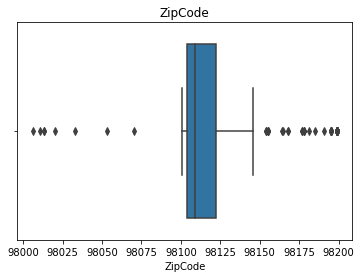

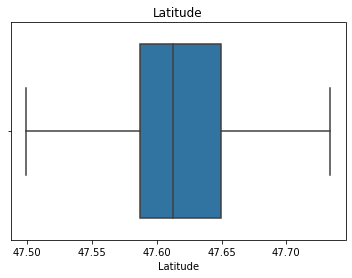

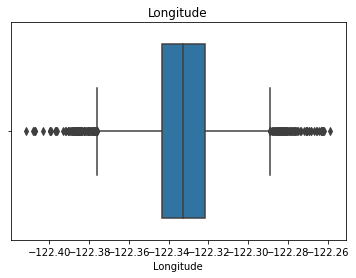

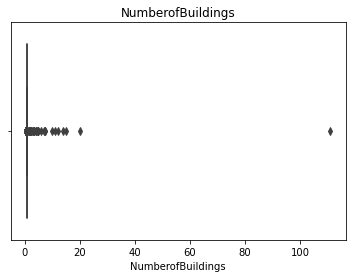

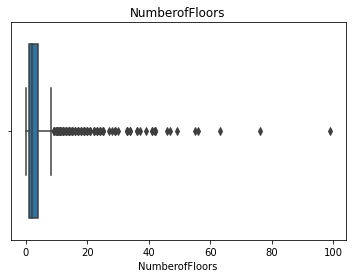

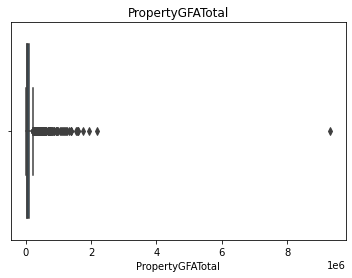

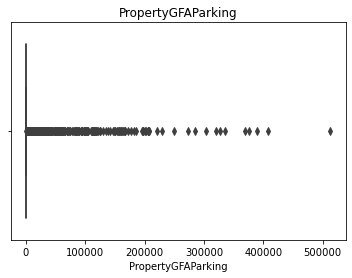

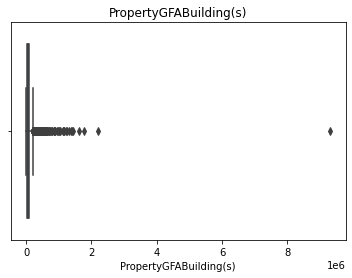

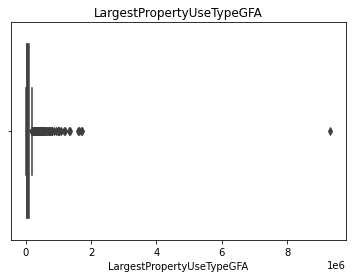

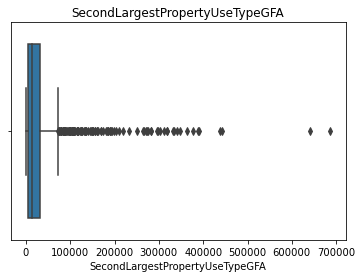

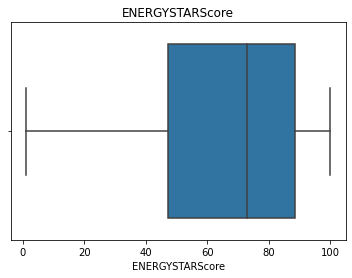

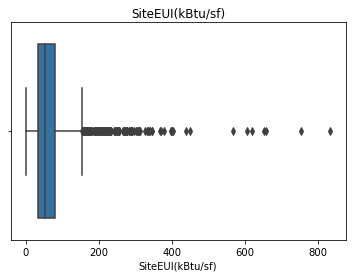

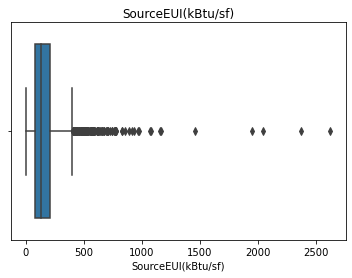

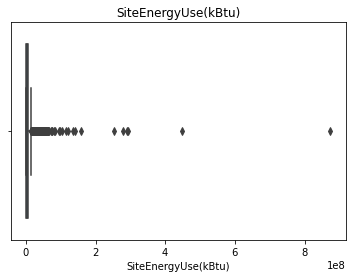

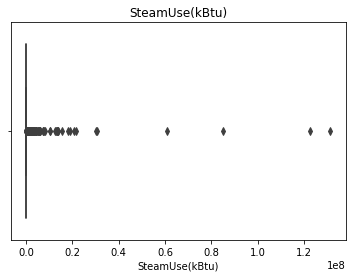

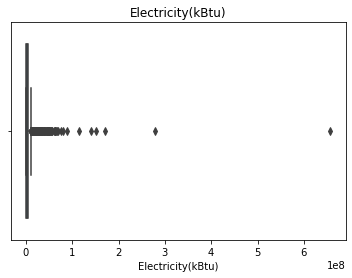

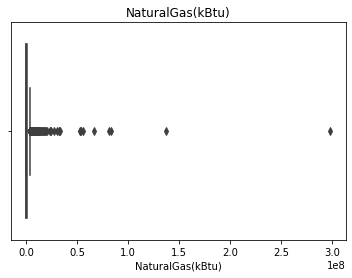

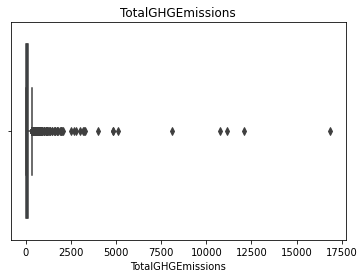

In [180]:
# Création des boîtes à moustache
for col_value in df.columns:
    if df[col_value].dtypes == 'float64':
        sns.boxplot(x=col_value, data=df)
        plt.title(col_value)
        plt.show()

In [181]:
upper_limit = df['SiteEnergyUse(kBtu)'].quantile(0.98)
df = df[df['SiteEnergyUse(kBtu)'] < upper_limit]

In [182]:
df.shape

(1638, 33)

# 3. Feature Engineering

In [183]:
df_refine = df.copy()

D'abord, On complète les usages de la partie la plus large

In [184]:
#On complète les usages de la partie la plus large
df['LargestPropertyUseType'] = df['LargestPropertyUseType'].fillna("Unknown")
df['NumberofFloors'] = df['NumberofFloors'].fillna(1)

On va definir deux nouvelle variable ratio surface batiment par rapport surface parking 

In [185]:
#On calcule les ratios
df['GFABuildingRate'] = (round((df['PropertyGFABuilding(s)'].fillna(0) /df['PropertyGFATotal'].fillna(0)),5))
df['GFAParkingRate'] = (round((df['PropertyGFAParking'].fillna(0) /df['PropertyGFATotal'].fillna(0)),5))

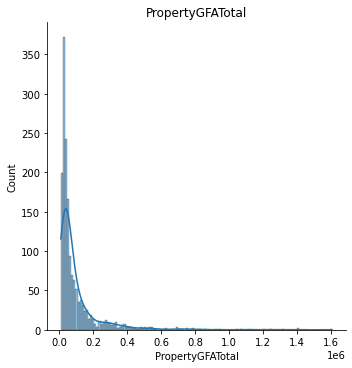

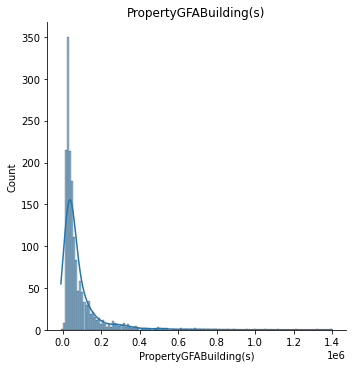

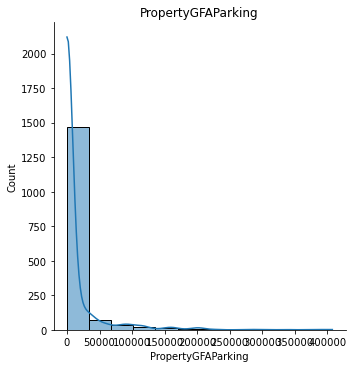

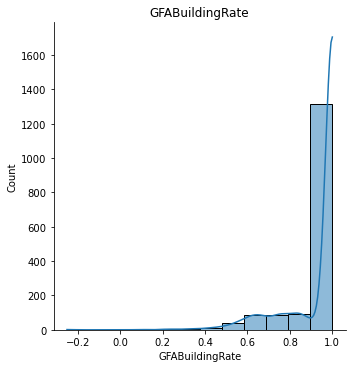

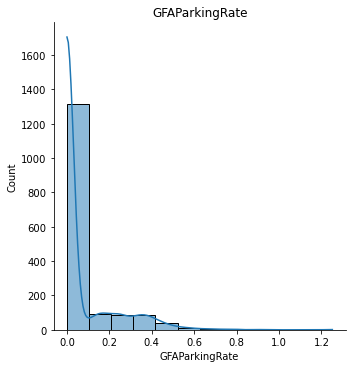

In [186]:
GFA_rate_var = ['PropertyGFATotal','PropertyGFABuilding(s)', 'PropertyGFAParking', 'GFABuildingRate', 'GFAParkingRate']
for cols in GFA_rate_var:
    sns.displot(x=cols, data=df, kde=True)
    plt.title(cols)
    plt.show()

On va ajouter une varibale volume du batiment,on calcule la volume du batiment par étage :property gfa building * nb_floors et la surface moyenne par bâtiment et par étage

In [187]:
df['GFA_Volume_Building'] = round((df['PropertyGFABuilding(s)'] * df['NumberofFloors']))
df['GFA_Building'] = round((df['PropertyGFATotal'] / df['NumberofBuildings']),3)
df['GFA_Floor'] = round((df['PropertyGFATotal'] / df['NumberofFloors']),3)

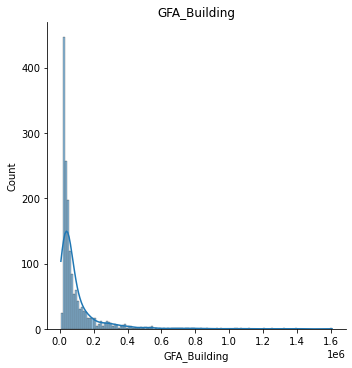

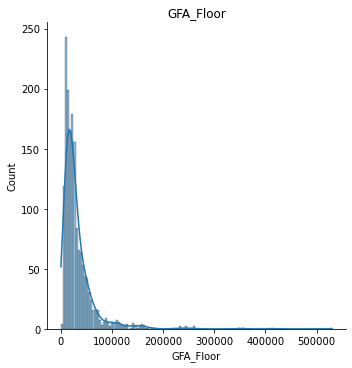

In [247]:
GFA_var = ['GFA_Building', 'GFA_Floor']
for cols in GFA_var:
    sns.displot(x=cols, data=df, kde=True)
    plt.title(cols)
    plt.show()

On ajoute deux colonnes pour trouver la consomation d'énrgie sur surface et l'émissions de CO2 GHG sur surface.Ensuite 

In [188]:
df['Energy_Surface'] = df['SiteEnergyUse(kBtu)']/df['PropertyGFATotal']
df['GHG_Surface'] = df['TotalGHGEmissions']/df['PropertyGFATotal']

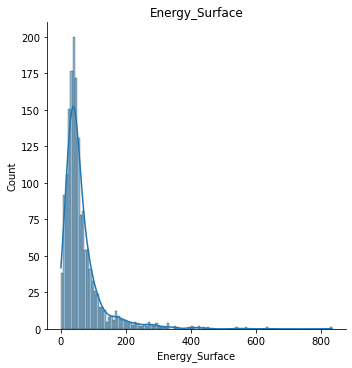

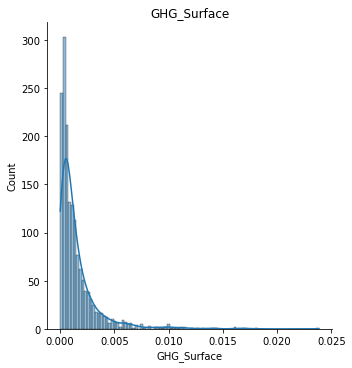

In [189]:
surface_var = ['Energy_Surface', 'GHG_Surface']
for cols in surface_var:
    sns.displot(x=cols, data=df, kde=True)
    plt.title(cols)
    plt.show()

In [190]:
# détection des outliers par groupe
columns = ['SiteEnergyUse(kBtu)','TotalGHGEmissions', 'GHG_Surface', 'Energy_Surface']
groups = df['PrimaryPropertyType'].unique()

for column in columns:
    i= 0
    for group in groups:
        j=0
        subset = df[df.PrimaryPropertyType == group]
        quartile_1 = subset[column].quantile(0.25)
        quartile_3 = subset[column].quantile(0.75)   
        iqr = quartile_3 - quartile_1
        min_value = quartile_1 - 1.5*iqr
        max_value = quartile_3 + 1.5*iqr
        outliers = subset[(subset[column]>max_value) | (subset[column]<min_value)]
        j += outliers.shape[0]
        i += j 
        print('groupe {}, {} outliers détectés'.format(group,j))
        #df.drop(outliers.index.values,inplace=True)
    print('Total {}, {} outliers détectés'.format(column,i))
    print('='*100)

groupe Supermarket/Store, 3 outliers détectés
groupe Small- and Mid-Sized Office, 14 outliers détectés
groupe Large Office, 15 outliers détectés
groupe Warehouse, 17 outliers détectés
groupe Other, 27 outliers détectés
groupe Medical Office, 0 outliers détectés
groupe Mixed Use Property, 16 outliers détectés
groupe Education, 20 outliers détectés
groupe Worship Facility, 4 outliers détectés
groupe Restaurant, 0 outliers détectés
groupe Hotel/Senior Care/Housing, 9 outliers détectés
groupe Distribution Center, 4 outliers détectés
groupe Laboratory, 0 outliers détectés
groupe Hospital, 0 outliers détectés
groupe Office, 0 outliers détectés
Total SiteEnergyUse(kBtu), 129 outliers détectés
groupe Supermarket/Store, 2 outliers détectés
groupe Small- and Mid-Sized Office, 29 outliers détectés
groupe Large Office, 14 outliers détectés
groupe Warehouse, 18 outliers détectés
groupe Other, 25 outliers détectés
groupe Medical Office, 3 outliers détectés
groupe Mixed Use Property, 16 outliers déte

Puisque notre distiribution est pas normal donc on peut pas utiliser les quartiles pour supprimer des outliers en plus les outliers détecté est 358 lignes donc on supprime pas .

On ajoute une variable "Age" qui sera plus précise que l'âge du bâtiment

In [191]:
df['Age'] = df['DataYear'] - df['YearBuilt']
print(df[['Age','DataYear','YearBuilt']])

      Age  DataYear  YearBuilt
0      26      2015       1989
1     109      2015       1906
2      68      2015       1947
3       7      2015       2008
4      34      2015       1981
...   ...       ...        ...
1691   26      2016       1990
1692   12      2016       2004
1693   42      2016       1974
1694   27      2016       1989
1695   78      2016       1938

[1638 rows x 3 columns]


# 4. Analyse exploratoire 

## 4.1. Analyse Univariées


On va voir la répartition des divers types de bâtiments à étudier :

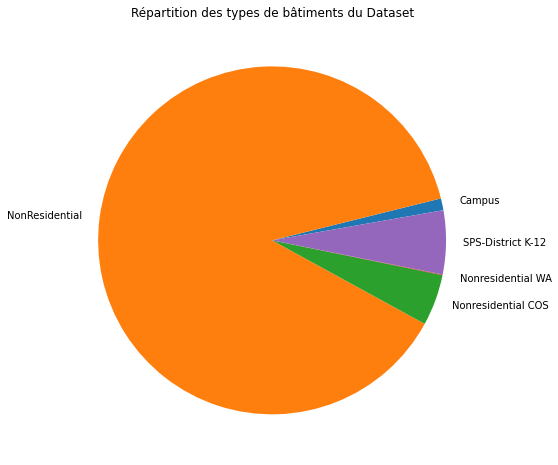

In [192]:
building_type = df.groupby(by='BuildingType')['OSEBuildingID'].nunique()
font_title = {'weight': 'bold', 'size': 12}
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(building_type.values, labels=building_type.index, shadow=False, startangle=10,textprops=dict(color="black",size=10))
ax.set_title("Répartition des types de bâtiments du Dataset")
plt.show()

la majeur partie des bâtiments sont typés "NonResidential".

On va voir la distribution des années de construction des bâtiments de Seattle

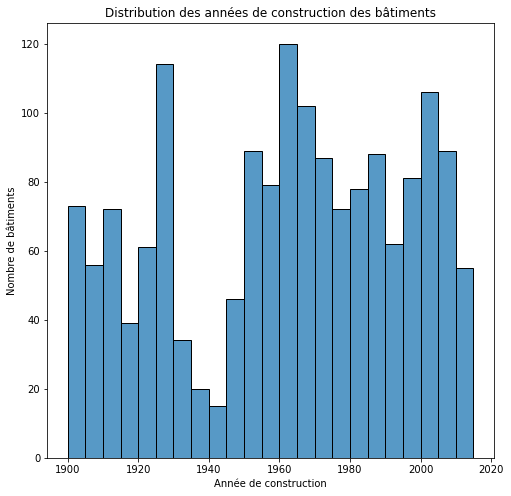

In [193]:
fig = plt.figure(figsize=(8,8))
ax = sns.histplot(data=df_refine, x='YearBuilt', bins=int((df.YearBuilt.max() - df.YearBuilt.min())/5))
ax.set_xlabel("Année de construction")
ax.set_ylabel("Nombre de bâtiments")
plt.title("Distribution des années de construction des bâtiments")
plt.show()

En suite, On vas voir la distribution quelques variables quantitatives comme YearBuilt et Age du bâtiment et après on va voir l'infulence d'âge sur d'autre paramètres

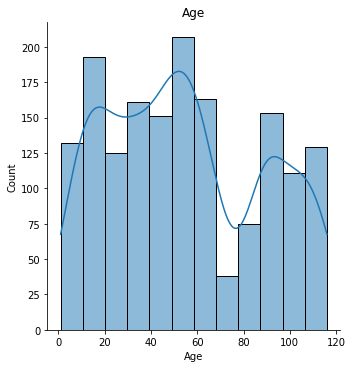

In [194]:
quant_var = ['Age']
for cols in quant_var:
    sns.displot(x=cols, data=df, kde=True)
    plt.title(cols)
    plt.show()

On va afficher répartition des bâtiments en distribution des variables catégorielles PrimaryPropertyType, SecondLargestPropertyUseType 

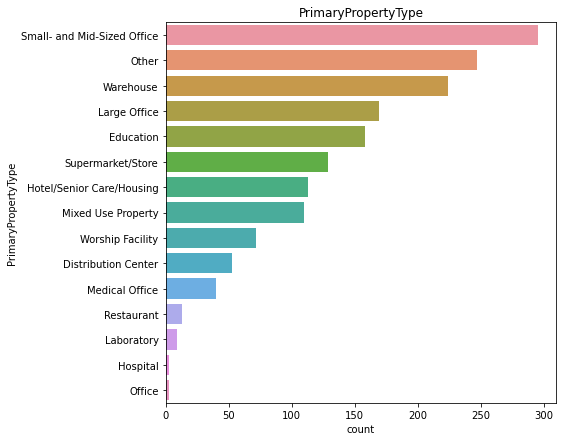

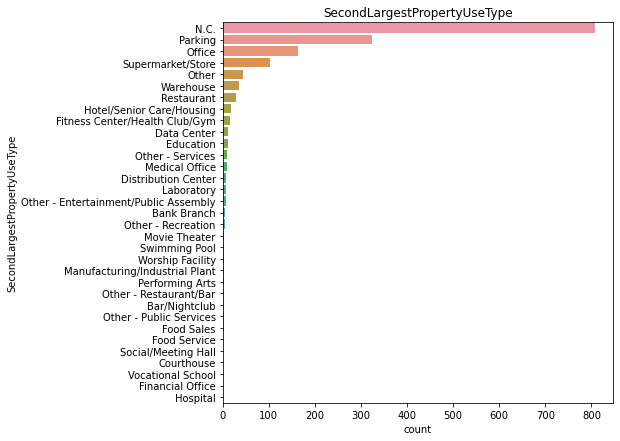

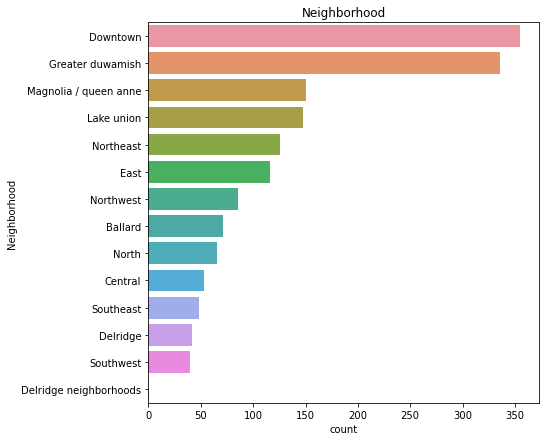

In [195]:
categorie_var = ["PrimaryPropertyType", "SecondLargestPropertyUseType", "Neighborhood"]
for cols in categorie_var:
    plt.figure(figsize=(7,7))
    sns.countplot(y=cols, data=df, order=df[cols].value_counts().index)
    plt.title(cols)
    plt.show()

On va voir la localisation des bâtiments dans Seattle

In [196]:
import folium
map_osm = folium.Map()
map_osm = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()],zoom_start=11)
for i in range(0,len(df)):
    folium.Circle([df.iloc[i]['Latitude'],df.iloc[i]['Longitude']], 
    popup=df.iloc[i]['Address'], radius =100).add_to(map_osm)
map_osm

## 4.2. Analyse multivariée

Dans un premier temps, nous allons regarder si le type de bâtiment a un effet sur la consommation d'énergie? 

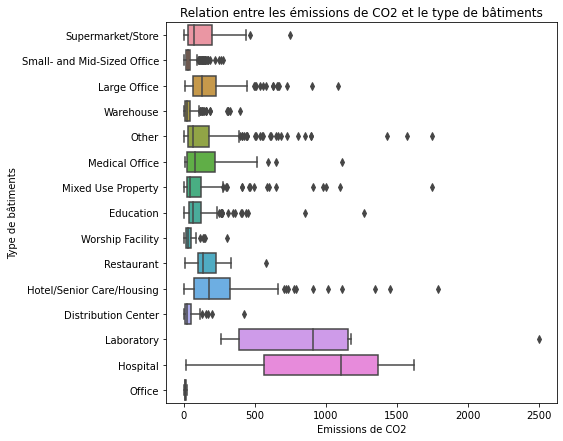

In [197]:
plt.figure(figsize=(7,7))
sns.boxplot(x="TotalGHGEmissions", y="PrimaryPropertyType", data=df)
plt.xlabel("Emissions de CO2")
plt.ylabel("Type de bâtiments")
plt.title("Relation entre les émissions de CO2 et le type de bâtiments")
plt.show()

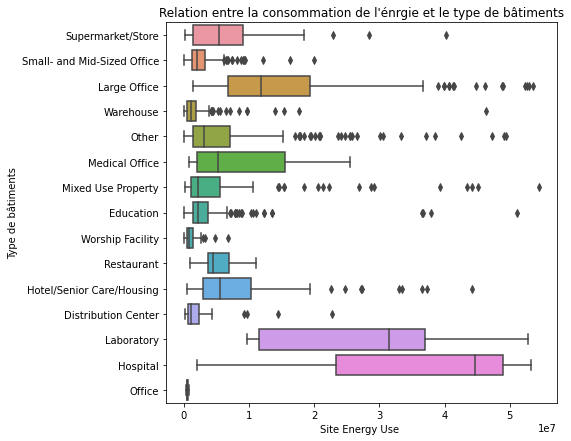

In [198]:
plt.figure(figsize=(7,7))
sns.boxplot(x="SiteEnergyUse(kBtu)", y="PrimaryPropertyType", data=df)
plt.xlabel("Site Energy Use ")
plt.ylabel("Type de bâtiments")
plt.title("Relation entre la consommation de l'énrgie et le type de bâtiments")
plt.show()

On va voir la corrélation entre des variables

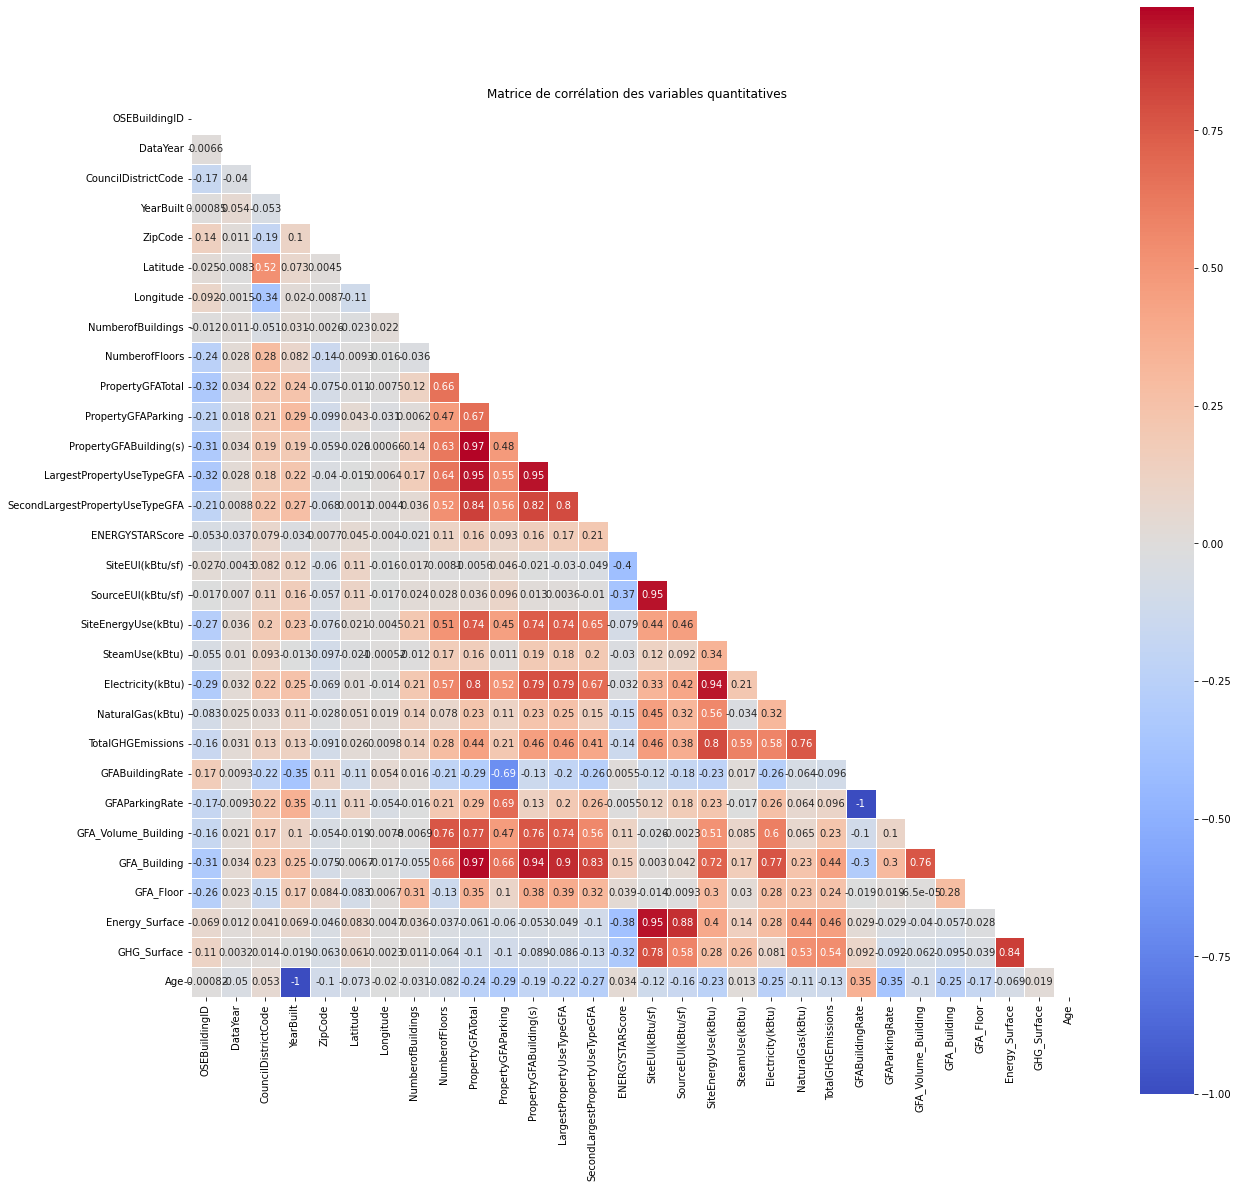

In [199]:
corr_matrix = df.corr()
mask = np.triu(corr_matrix)
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, cmap="coolwarm", mask=mask, linewidths=.7, annot=True, cbar=True, square=True)
plt.title("Matrice de corrélation des variables quantitatives")
plt.show()

On observe une forte corrélation entre 

- Electricity et SiteEnergyUse (96%)
- SiteEnergyUse et PropertyGFABuilding (82%)
- PropertyGFABuilding et PropertyGFATotal (99%)
- PropertyGFATotal et LargestPropertyUseTypeGFA (98% )sont liés à TotalGHGEmissions et également à SiteEnergyUse

On voit que prédire l’une des variables target aide à prédire l’autre

Il y a aussi une corrélation entre la consommation d'énergie et les émissions de gaz à effets de serre

On aimerait maintenant savoir si l'âge du bâtiment influence sur la consommation énergétique et du bâtiment. Pour cela, il faudra dans un premier temps discrétiser le variable Age en 4 sous-groupes de même tailles, afin de faciliter l'analyse. On va stocker les sous-catégories dans la nouvelle variable 'categories_age'. Indice fonction qcut de pandas.

In [200]:
df['categories_age'] = pd.qcut(df['Age'], 5, duplicates='drop')

De la même manière, on discrétise la variable 'SiteEnergyUse(kBtu)' en 5 sous-groupes. On stocke les sous-catégories dans la nouvelle variable categories_consommation.

In [201]:
df['categories_consommation'] = pd.qcut(df['SiteEnergyUse(kBtu)'], 5, duplicates='drop')

À l'aide d'un tableau croisé des variables categories_age et categories_consommation, on vérifie si il existe une influence de l'âge sur la consommation d'énergie .Est-ce qu'une tendance particulière se dégage ?

In [202]:
pd.crosstab(df['categories_age'], df['categories_consommation'])

categories_consommation  (16979.449, 1026740.75]  (1026740.75, 1878554.125]  \
categories_age                                                                
(0.999, 21.0]                                 24                         39   
(21.0, 43.0]                                  61                         69   
(43.0, 59.2]                                  75                         69   
(59.2, 90.0]                                  89                         78   
(90.0, 116.0]                                 79                         72   

categories_consommation  (1878554.125, 3433585.725]  (3433585.725, 8161338.3]  \
categories_age                                                                  
(0.999, 21.0]                                    56                        82   
(21.0, 43.0]                                     60                        63   
(43.0, 59.2]                                     69                        54   
(59.2, 90.0]                                     63                        63   
(90.0, 116.0]                                    80                        65   

categories_consommation  (8161338.3, 54454322.0]  
categories_age                                    
(0.999, 21.0]                                130  
(21.0, 43.0]                                  77  
(43.0, 59.2]                                  55  
(59.2, 90.0]                                  38  
(90.0, 116.0]                                 28

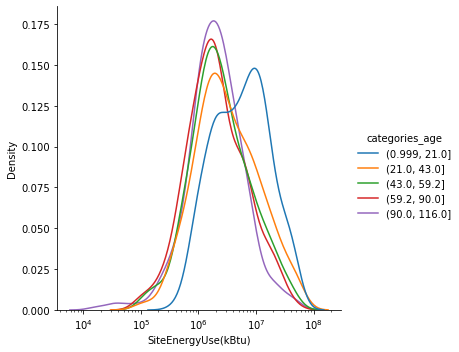

In [203]:
sns.displot(data=df, x="SiteEnergyUse(kBtu)", hue="categories_age", kind="kde", log_scale=True)

<Figure size 504x504 with 0 Axes>

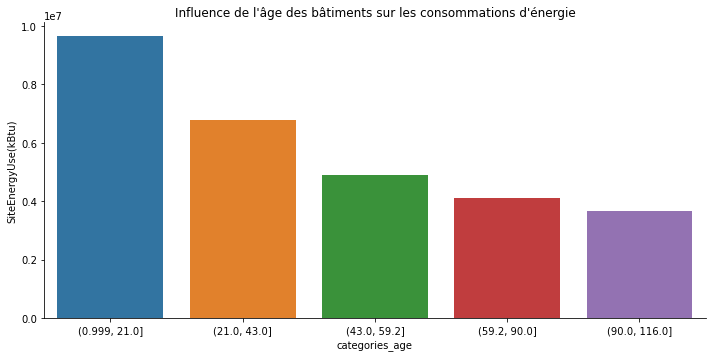

In [204]:
plt.figure(figsize=(7,7))
sns.catplot(data=df, kind="bar", x='categories_age', y="SiteEnergyUse(kBtu)", ci=None, aspect=2)
plt.title("Influence de l'âge des bâtiments sur les consommations d'énergie")
plt.show()

On vas voir l'influence de l'âge du bâtiment sur l'émissions de CO2.

In [205]:
df['categories_CO2'] = pd.qcut(df['TotalGHGEmissions'], 5, duplicates='drop')

In [206]:
pd.crosstab(df['categories_age'], df['categories_CO2'])

categories_CO2  (0.119, 14.803]  (14.803, 35.573]  (35.573, 68.139]  \
categories_age                                                        
(0.999, 21.0]                30                61                59   
(21.0, 43.0]                 75                76                59   
(43.0, 59.2]                 72                56                72   
(59.2, 90.0]                 66                63                77   
(90.0, 116.0]                85                71                61   

categories_CO2  (68.139, 169.486]  (169.486, 2501.165]  
categories_age                                          
(0.999, 21.0]                  75                  106  
(21.0, 43.0]                   58                   62  
(43.0, 59.2]                   54                   68  
(59.2, 90.0]                   73                   52  
(90.0, 116.0]                  67                   40

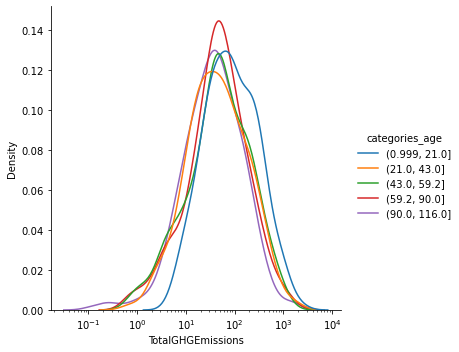

In [207]:
sns.displot(data=df, x="TotalGHGEmissions", hue="categories_age", kind="kde", log_scale=True);

<Figure size 504x504 with 0 Axes>

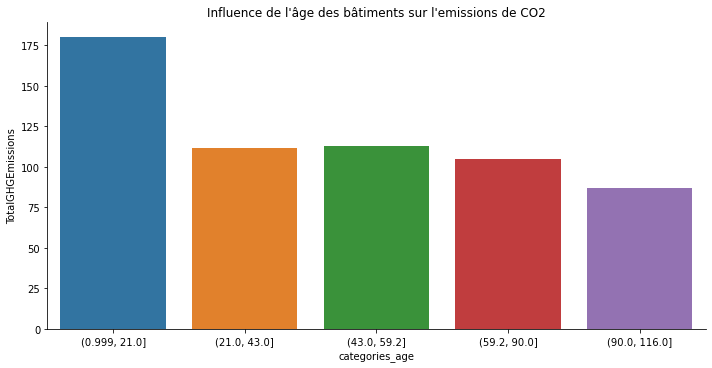

In [208]:
plt.figure(figsize=(7,7))
sns.catplot(data=df, kind="bar", x='categories_age', y="TotalGHGEmissions", ci=None, aspect=2)
plt.title("Influence de l'âge des bâtiments sur l'emissions de CO2")
plt.show()

Est-ce que le type de bâtiment a un effet sur la consommation d'énergie? 

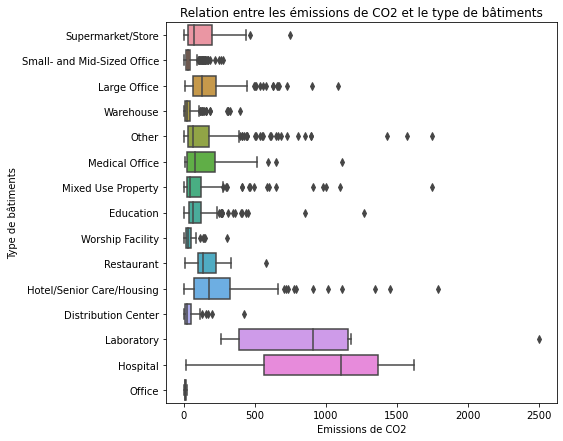

In [209]:
plt.figure(figsize=(7,7))
sns.boxplot(x="TotalGHGEmissions", y="PrimaryPropertyType", data=df)
plt.xlabel("Emissions de CO2")
plt.ylabel("Type de bâtiments")
plt.title("Relation entre les émissions de CO2 et le type de bâtiments")
plt.show()

La plus consommation d'énrgie est pour les hôpiteaux donc le type de bâtiment va avoir un large effet du type de propriété sur la consommation d'énergie. 

Est-ce que le type de quartier a un effet sur la consommation d'énergie?


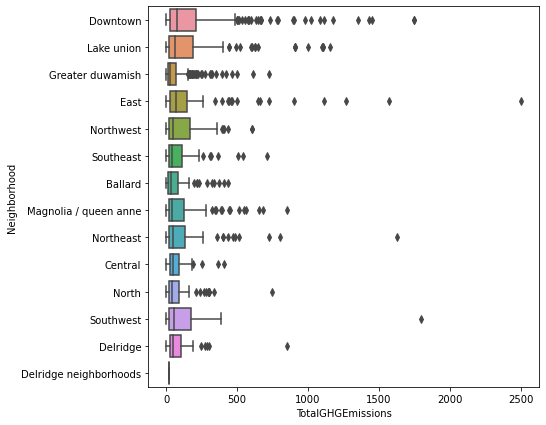

In [210]:
plt.figure(figsize=(7,7))
plt.xlabel("Emissions de CO2")
plt.ylabel("Type de quartier")
sns.boxplot(x="TotalGHGEmissions", y="Neighborhood", data=df)
plt.show()

Il y a un effet modéré de la localisation d'un bâtiment dans un quartier sur les émissions de CO2.

On va voir la distribution des consommations en fonction des surfaces totales au sol par catégorie de bâtiment

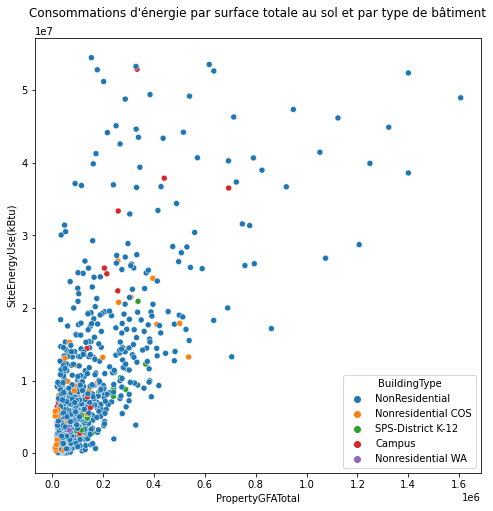

In [211]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x='PropertyGFATotal', y='SiteEnergyUse(kBtu)', hue='BuildingType')
plt.title(f"Consommations d'énergie par surface totale au sol et par type de bâtiment\n")
plt.show()

On va regarder l'impact du passage à l'échelle logarithmique sur les distribution. L'analyse exploratoire a montré qu'elles ne suivaient pas une loi normale,On voit que en passant les données à l'échelle logarithmique,on obtien une distribution normale des données à prédire. On va donc appliquer cette transformation dans notre pipeline.

In [212]:
df["SiteEnergyUse(kBtu)_log"] = np.log(df["SiteEnergyUse(kBtu)"])
df["TotalGHGEmissions_log"] = np.log(df["TotalGHGEmissions"])

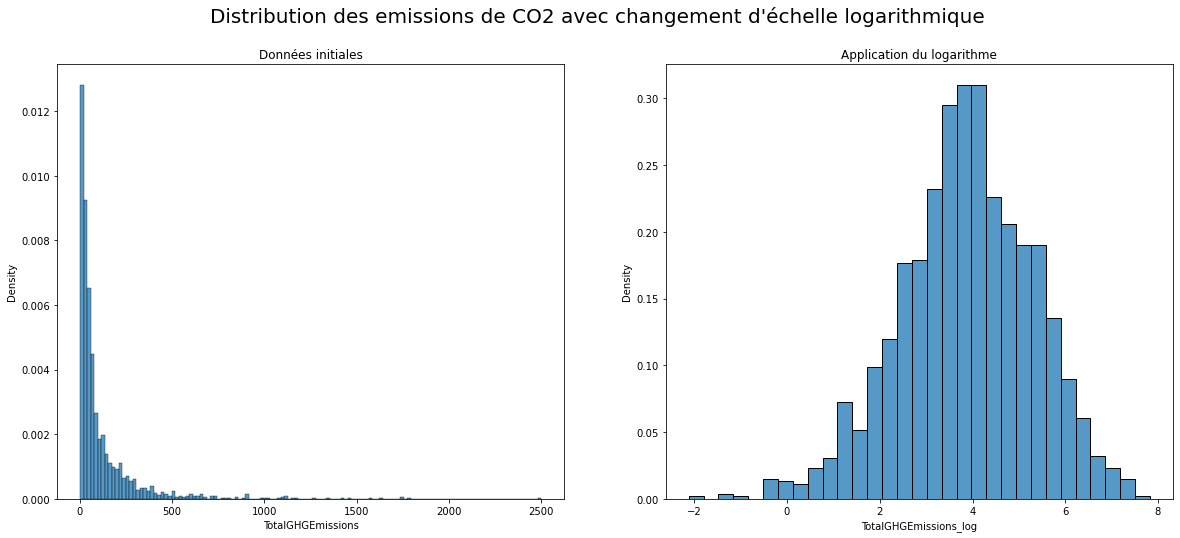

In [213]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.histplot(data=df['TotalGHGEmissions'], stat="density", ax=axes[0])
axes[0].set_title("Données initiales")
sns.histplot(data= df['TotalGHGEmissions_log'], stat="density", ax=axes[1])
axes[1].set_title("Application du logarithme")
plt.suptitle("Distribution des emissions de CO2 avec changement d'échelle logarithmique",  fontsize=20)
plt.show()

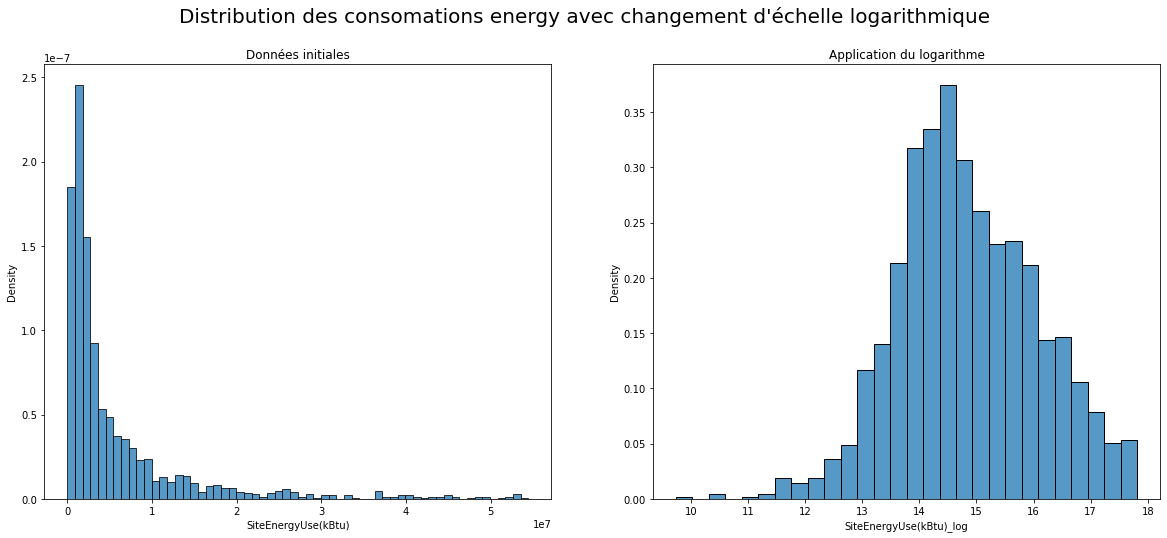

In [214]:
# Transformation logarithmique des variables cibles
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.histplot(data=df['SiteEnergyUse(kBtu)'], stat="density", ax=axes[0])
axes[0].set_title("Données initiales")
sns.histplot(data=df['SiteEnergyUse(kBtu)_log'], stat="density", ax=axes[1])
axes[1].set_title("Application du logarithme")
plt.suptitle("Distribution des consomations energy avec changement d'échelle logarithmique", fontsize=20)
plt.show()

On va voir la distribution de energy_star_score ainsi que sa relation avec les émissions de CO2 :

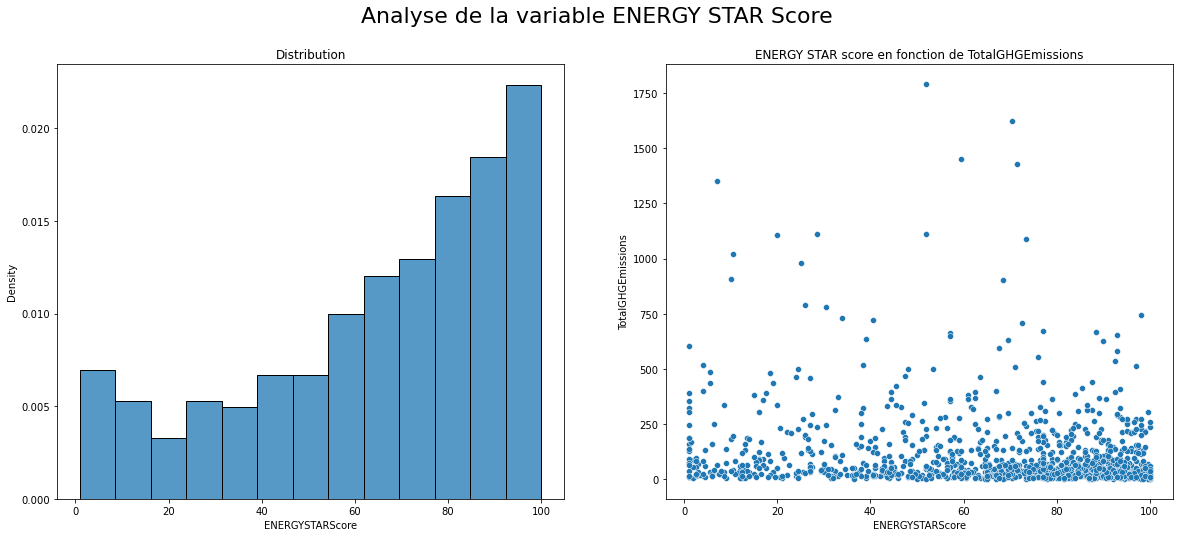

In [215]:
X = df[['ENERGYSTARScore']]

#Filtrage des données ayant un Energy Star Score renseigné
X = X[X['ENERGYSTARScore'].isnull()==False]
Y = df[['TotalGHGEmissions']]
Z = df[['SiteEnergyUse(kBtu)']]

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.histplot(data=X, x='ENERGYSTARScore', stat="density", ax=axes[0])
axes[0].set_title("Distribution")
sns.scatterplot(data=pd.concat([X,Y], axis=1), y='TotalGHGEmissions', x='ENERGYSTARScore', ax=axes[1])
axes[1].set_title("ENERGY STAR score en fonction de TotalGHGEmissions")
plt.suptitle("Analyse de la variable ENERGY STAR Score", fontsize=22)
plt.show()

La distribution ne suit pas de loi normale et la majorité des batiments a un score supérieur à 50.Il semble que le score ENERGY STAR n'a pas une corrélation importante avec les émissions de CO2. 

On va voir la distribution de energy_star_score ainsi que sa relation avec la consomation d'enrgie :

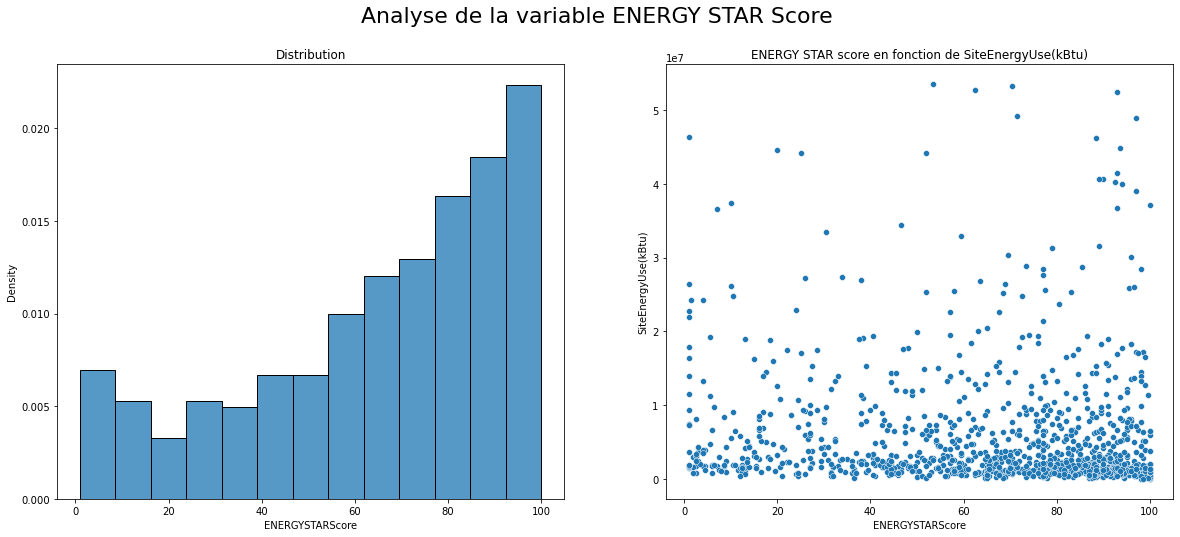

In [216]:
Z = df[['SiteEnergyUse(kBtu)']]

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.histplot(data=X, x='ENERGYSTARScore', stat="density", ax=axes[0])
axes[0].set_title("Distribution")
sns.scatterplot(data=pd.concat([X,Z], axis=1), y='SiteEnergyUse(kBtu)', x='ENERGYSTARScore', ax=axes[1])
axes[1].set_title("ENERGY STAR score en fonction de SiteEnergyUse(kBtu)")
plt.suptitle("Analyse de la variable ENERGY STAR Score", fontsize=22)
plt.show()

Il semble que le score ENERGY STAR n'a pas une corrélation avec la consomation d'énrgie. 

et la dernière étape la complétion des NaN de certaines variables par des valeurs Complétion avec 0 :

In [217]:
col_nan_to_zero = ['SecondLargestPropertyUseTypeGFA','LargestPropertyUseTypeGFA','ListOfAllPropertyUseTypes', 'LargestPropertyUseType']
col_no_use = ['LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType']
df[col_nan_to_zero] = df[col_nan_to_zero].fillna(0, )

<AxesSubplot:>

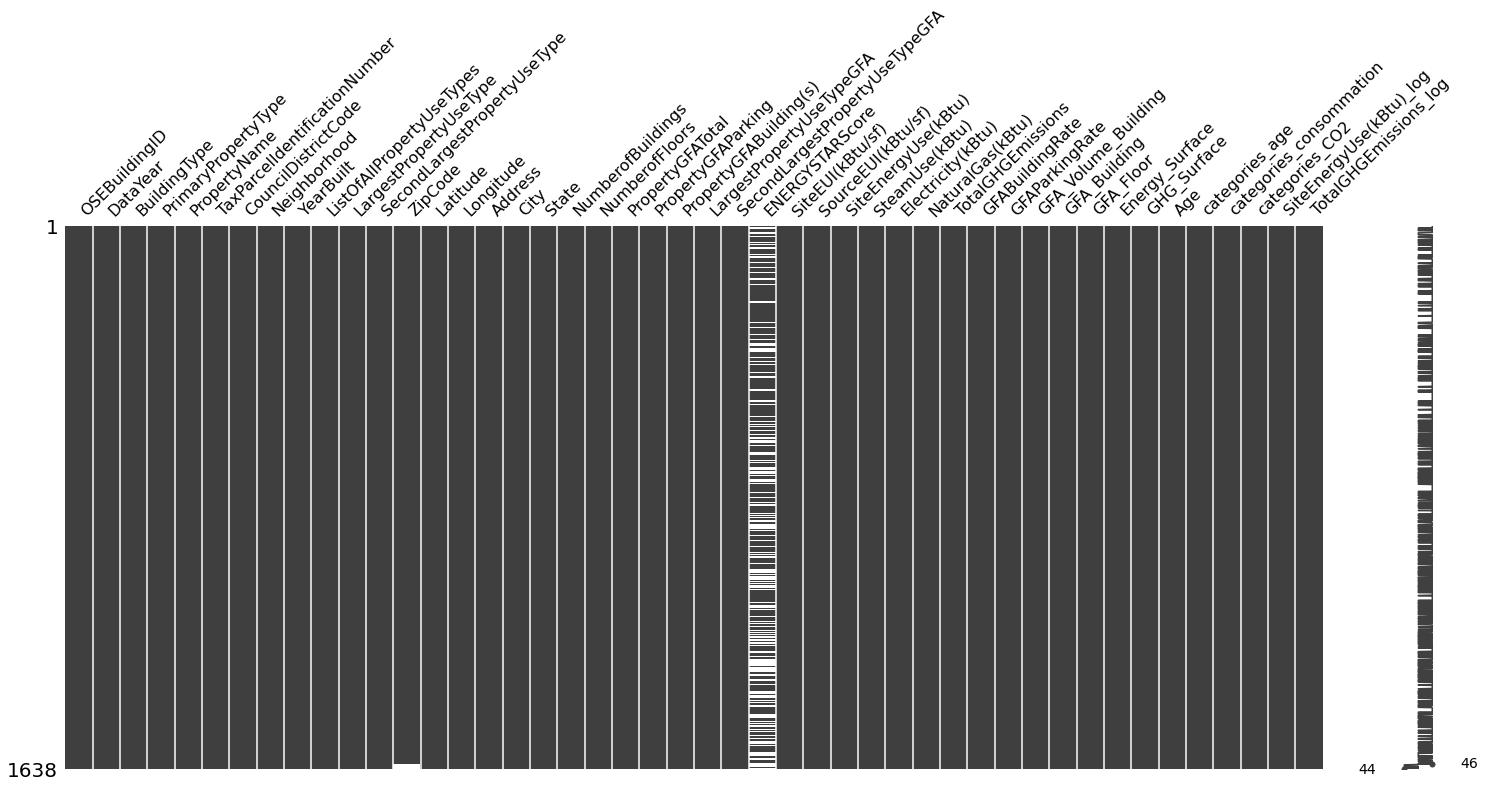

In [218]:
msno.matrix(df)

In [219]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ZipCode',
       'Latitude', 'Longitude', 'Address', 'City', 'State',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GFABuildingRate',
       'GFAParkingRate', 'GFA_Volume_Building', 'GFA_Building', 'GFA_Floor',
       'Energy_Surface', 'GHG_Surface', 'Age', 'categories_age',
       'categories_consommation', 'categories_CO2', 'SiteEnergyUse(kBtu)_log',
       'TotalGHGEmissions_lo



### les variables à prédire :
Les émissions de CO2 (TotalGHGEmissions) et la consommation d'énergie du bâtiment (SiteEnergyUse(kBtu))  sont les deux cibles que l'on cherche à prédire, on les mettra donc dans une variable y.

On voit que certaines valeurs notre jeu de données sont d'origine et d'autres proviennent d'une opération de feature engineering. On va donc supprimer les doublons pour éviter la fuite de donneés.

### Un ensemble de variables utiles pour prédire les deux variables targets:


       'Age', 'BuildingType', 'PrimaryPropertyType',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'GFABuildingRate','GFAParkingRate',
       'TotalGHGEmissions', 'SiteEnergyUse(kBtu)'
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType','ENERGYSTARScore',
       'Latitude', 'Longitude'

- On préfére utiliser la variable "Age" donc l'année de construction des bâtiments va supprimer.


Certaines lignes comportent des manquants sur ces variables, nous allons donc les supprimer :

In [220]:
df_refine = df[~((df['SiteEnergyUse(kBtu)'].isnull()) | (df['TotalGHGEmissions'].isnull()))]

In [221]:
# Supprimer les colonnes supplèmentaire 
cols_to_remove = ['OSEBuildingID', 'DataYear','PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode','ZipCode', 'Address', 'City', 'State',
       'NumberofBuildings', 'NumberofFloors', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)','SiteEnergyUse(kBtu)_log', 'TotalGHGEmissions_log']
df_refine = df_refine.drop(cols_to_remove, axis=1)


In [222]:
df_refine.shape

(1638, 28)

On va vérifier la corrélation afin de décider pour garder entre PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s)

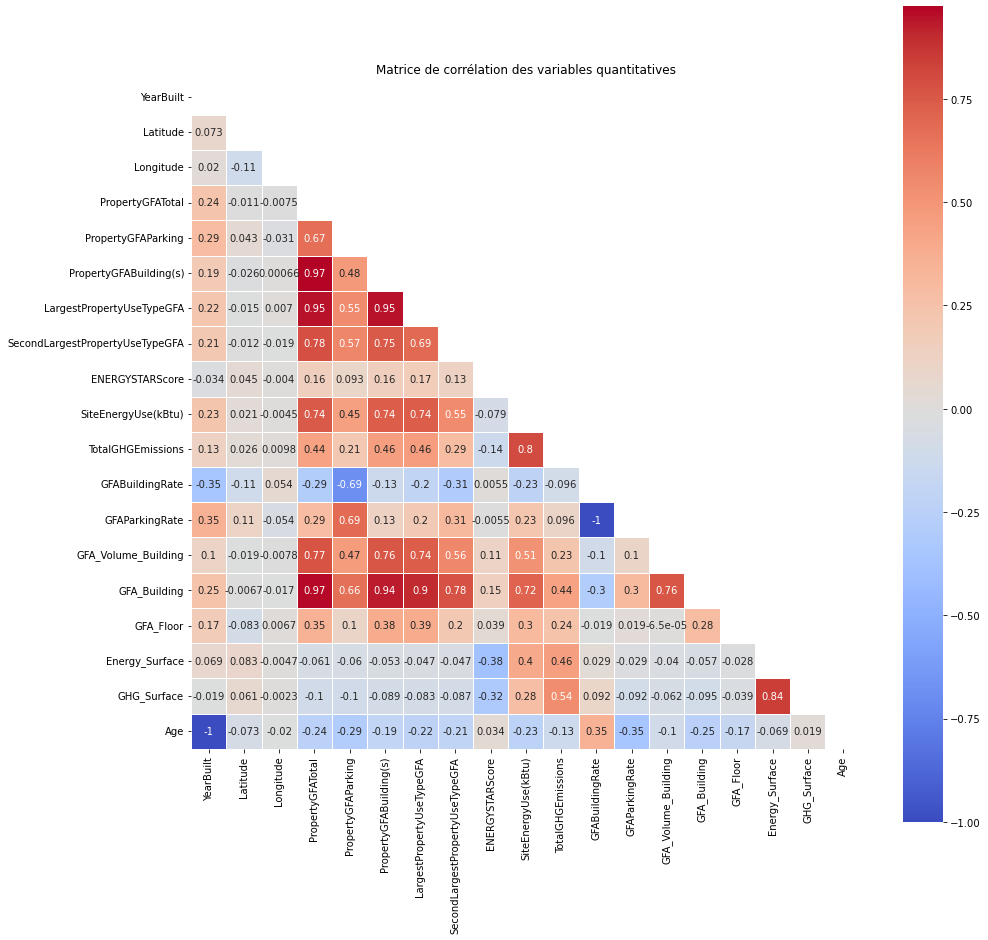

In [223]:
corr_matrix = df_refine.corr()
mask = np.triu(corr_matrix)
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, cmap="coolwarm", mask=mask, linewidths=.5, annot=True, cbar=True, square=True)
plt.title("Matrice de corrélation des variables quantitatives")
plt.show()

nous allons supprimer les variables qui n'apporteront rien à notre modèle 

In [244]:
df_model = df_refine.drop(['YearBuilt','PropertyGFABuilding(s)', 'Energy_Surface', 'GHG_Surface', 'categories_age', 'categories_consommation', 'categories_CO2', 'PropertyGFAParking', 'PropertyGFABuilding(s)'], axis=1)
df_model.head(3)

BuildingType          PrimaryPropertyType Neighborhood  \
0  NonResidential            Supermarket/Store     Downtown   
1  NonResidential  Small- and Mid-Sized Office     Downtown   
2  NonResidential                 Large Office   Lake union   

                         ListOfAllPropertyUseTypes LargestPropertyUseType  \
0                                                0                Unknown   
1                                           Office                 Office   
2  Data Center, Office, Other, Parking, Restaurant                 Office   

  SecondLargestPropertyUseType   Latitude   Longitude  PropertyGFATotal  \
0                         N.C.  47.611711 -122.336816          111077.0   
1                         N.C.  47.606799 -122.337100           98370.0   
2                      Parking  47.621476 -122.343050          193788.0   

   LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
0                        0.0                              0.0   
1                    98370.0                              0.0   
2                   138672.0                          47539.0   

   ENERGYSTARScore  SiteEnergyUse(kBtu)  TotalGHGEmissions  GFABuildingRate  \
0             91.0            9898724.0              69.01          1.00000   
1             45.0            6525887.0              47.24          0.73651   
2             59.0           16760217.0             116.84          0.80466   

   GFAParkingRate  GFA_Volume_Building  GFA_Building  GFA_Floor  Age  
0         0.00000             444308.0      111077.0   27769.25   26  
1         0.26349             434700.0       98370.0   16395.00  109  
2         0.19534             623736.0      193788.0   48447.00   68

On peut passer à la modélisation en sauvgardant notre dataset building-energy-cleaned.csv.

In [245]:
df_model.to_csv("building-energy-cleaned.csv", index=False)